In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


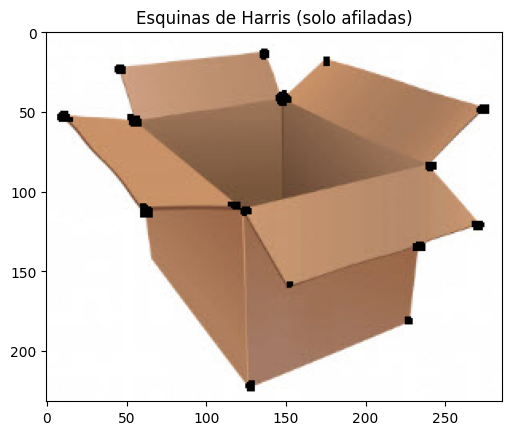

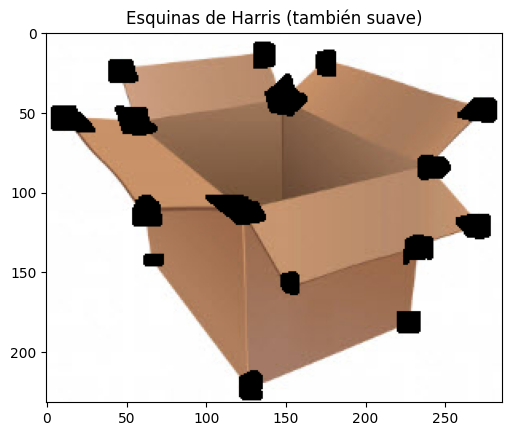

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

ruta = '/content/drive/MyDrive/input91.jpg'

img = cv2.imread(ruta)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Para detectar solo esquinas afiladas
dst = cv2.cornerHarris(gray, blockSize=4, ksize=5, k=0.04)
# El resultado se dilata para resaltar las esquinas.
dst = cv2.dilate(dst, None)
# Umbral para un valor óptimo, puede variar según la imagen
img[dst > 0.01 * dst.max()] = [0, 0, 0]
img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.title('Esquinas de Harris (solo afiladas)')
plt.imshow(img_cvt)
plt.show()

# Para detectar esquinas blandas
dst = cv2.cornerHarris(gray, blockSize=14, ksize=5, k=0.04)
dst = cv2.dilate(dst, None)
img[dst > 0.01 * dst.max()] = [0, 0, 0]
img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.title('Esquinas de Harris (también suave)')
plt.imshow(img_cvt)
plt.show()


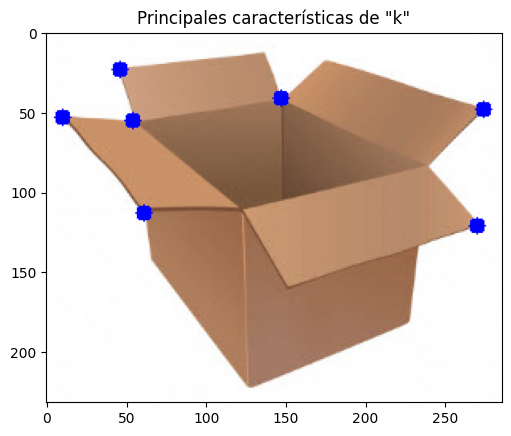

In [ ]:
img = cv2.imread(ruta)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray, maxCorners=7, qualityLevel=0.05, minDistance=25)
corners = np.float32(corners)

for item in corners:
    x, y = item[0]
    x, y = int(x), int(y)  # Convertir a enteros
    cv2.circle(img, (x, y), 5, (255, 0, 0), -1)

img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.title('Principales características de "k"')
plt.imshow(img_cvt)
plt.show()


In [15]:
ruta2='/content/drive/MyDrive/input92.jpg'

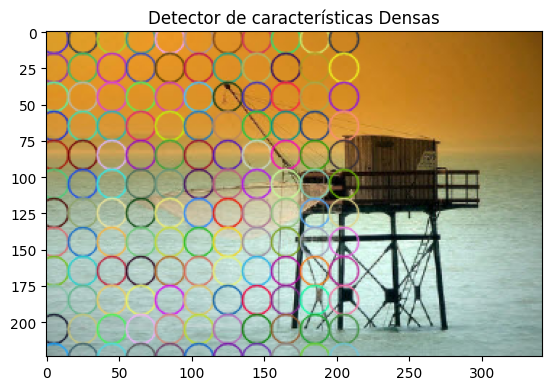

In [16]:
class DenseDetector():
    def __init__(self, step_size=20, feature_scale=20, img_bound=20):
        # Create a dense feature detector
        self.initXyStep = step_size
        self.initFeatureScale = feature_scale
        self.initImgBound = img_bound
    
    def detect(self, img):
        keypoints = []
        rows, cols = img.shape[:2]
        for x in range(self.initImgBound, rows, self.initFeatureScale):
            for y in range(self.initImgBound, cols, self.initFeatureScale):
                keypoints.append(cv2.KeyPoint(float(x), float(y), self.initXyStep))
        return keypoints

if __name__ == "__main__":
    input_image = cv2.imread(ruta2)
    input_image_dense = np.copy(input_image)
    input_image_shift = np.copy(input_image)
    keypoints = DenseDetector(20, 20, 5).detect(input_image)
    
    # Draw keypoints on top of the input image
    input_image_dense = cv2.drawKeypoints(input_image_dense, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    # Display the output image
    img_cvt = cv2.cvtColor(input_image_dense, cv2.COLOR_BGR2RGB)
    plt.title('Detector de características Densas')
    plt.imshow(img_cvt)
    plt.show()


In [17]:
ruta3='/content/drive/MyDrive/input93.jpg'

Número de puntos clave con non max suppression: 217


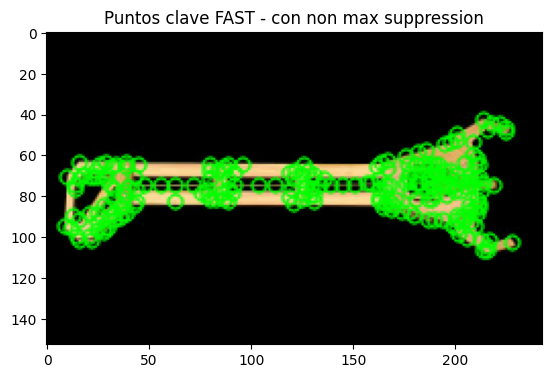

Puntos clave totales sin nonmaxSuppression: 1081


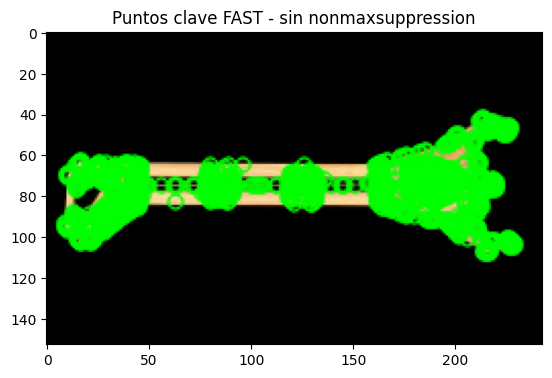

In [18]:
input_image = cv2.imread(ruta3)
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Version anterior a OpenCV 3.0.0 cv2.FastFeatureDetector()
fast = cv2.FastFeatureDetector_create()

# Detectar puntos clave
keypoints = fast.detect(gray_image, None)
print("Número de puntos clave con non max suppression:", len(keypoints))

# Dibujar puntos clave en la parte superior de la imagen de entrada
img_keypoints_with_nonmax = input_image.copy()
cv2.drawKeypoints(input_image, keypoints, img_keypoints_with_nonmax, color=(0, 255, 0),
                  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_cvt = cv2.cvtColor(img_keypoints_with_nonmax, cv2.COLOR_BGR2RGB)
plt.title('Puntos clave FAST - con non max suppression')
plt.imshow(img_cvt)
plt.show()

# Deshabilitar nonmaxsuppression
fast.setNonmaxSuppression(False)

# Detectar puntos clave de nuevo
keypoints = fast.detect(gray_image, None)
print("Puntos clave totales sin nonmaxSuppression:", len(keypoints))

# Dibujar puntos clave en la parte superior de la imagen de entrada
img_keypoints_without_nonmax = input_image.copy()
cv2.drawKeypoints(input_image, keypoints, img_keypoints_without_nonmax, color=(0, 255, 0),
                  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_cvt = cv2.cvtColor(img_keypoints_without_nonmax, cv2.COLOR_BGR2RGB)
plt.title('Puntos clave FAST - sin nonmaxsuppression')
plt.imshow(img_cvt)
plt.show()


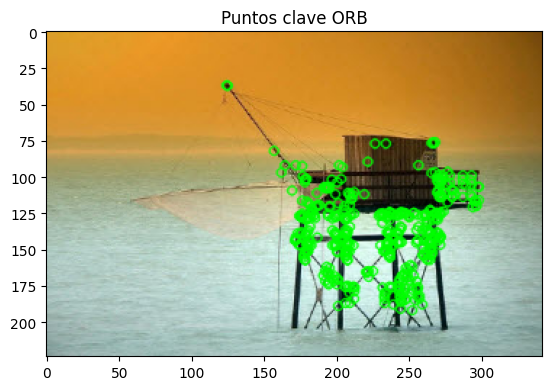

In [19]:
input_image = cv2.imread(ruta2)
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Inicie el objeto ORB, antes de OpenCV 3.0.0 se utilizaba cv2.ORB()
orb = cv2.ORB_create()

# Encontrar los puntos clave con ORB
keypoints = orb.detect(gray_image, None)

# Calcular los descriptores con ORB
keypoints, descriptors = orb.compute(gray_image, keypoints)

# Dibujar solo la ubicación de los puntos clave sin tamaño ni orientación
cv2.drawKeypoints(input_image, keypoints, input_image, color=(0, 255, 0))

img_cvt = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.title('Puntos clave ORB')
plt.imshow(img_cvt)
plt.show()
